# 21F-9104 - SAAD NADEEM - LAB-13

# Q1-PART-A

In [12]:
import csv
import random
import math

# Load data from CSV file
def load_data(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            dataset.append([float(row[3]), float(row[4])])  # annual_income and spending_score
    return dataset[:20]  # First 20 data-points

# Calculate Euclidean distance between two points
def calculate_distance(point1, point2):
    return math.sqrt(sum((i - j) ** 2 for i, j in zip(point1, point2)))

# Assign each data point to the closest centroid
def assign_points_to_clusters(centroids, dataset):
    clusters = [[] for _ in centroids]
    for idx, data in enumerate(dataset):
        closest_centroid_index = min(range(len(centroids)), key=lambda index: calculate_distance(data, centroids[index]))
        clusters[closest_centroid_index].append(idx)
    return clusters

# Recalculate centroids
def calculate_centroids(clusters, dataset):
    return [[sum(dataset[idx][col] for idx in cluster) / len(cluster) for col in range(len(dataset[0]))] for cluster in clusters]

# K-Means clustering
def k_means(dataset, k):
    # Initialize centroids randomly from the dataset
    centroids = random.sample(dataset, k)
    while True:
        clusters = assign_points_to_clusters(centroids, dataset)
        new_centroids = calculate_centroids(clusters, dataset)
        if centroids == new_centroids:
            break
        centroids = new_centroids
    return clusters, centroids

# Load dataset
dataset = load_data('Mall_Customers.csv')

# Apply K-Means clustering
clusters, centroids = k_means(dataset, 3)

# Print clusters
for i, cluster in enumerate(clusters):
    print(f'Cluster {i+1}:')
    for idx in cluster:
        print(f'  Data-point {idx+1}: {dataset[idx]}')
    print(f'  Centroid: {centroids[i]}')
    print()

Cluster 1:
  Data-point 2: [15.0, 81.0]
  Data-point 4: [16.0, 77.0]
  Data-point 6: [17.0, 76.0]
  Data-point 8: [18.0, 94.0]
  Data-point 10: [19.0, 72.0]
  Data-point 12: [19.0, 99.0]
  Data-point 14: [20.0, 77.0]
  Data-point 16: [20.0, 79.0]
  Data-point 18: [21.0, 66.0]
  Data-point 20: [23.0, 98.0]
  Centroid: [18.8, 81.9]

Cluster 2:
  Data-point 3: [16.0, 6.0]
  Data-point 7: [18.0, 6.0]
  Data-point 9: [19.0, 3.0]
  Data-point 11: [19.0, 14.0]
  Data-point 13: [20.0, 15.0]
  Data-point 15: [20.0, 13.0]
  Centroid: [18.666666666666668, 9.5]

Cluster 3:
  Data-point 1: [15.0, 39.0]
  Data-point 5: [17.0, 40.0]
  Data-point 17: [21.0, 35.0]
  Data-point 19: [23.0, 29.0]
  Centroid: [19.0, 35.75]



# Q1-PART-B

   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

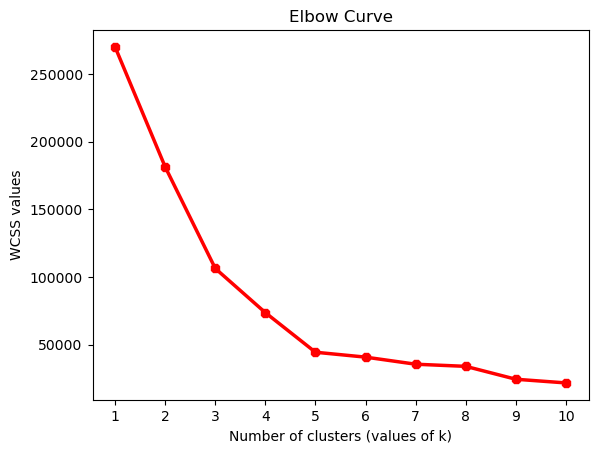

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


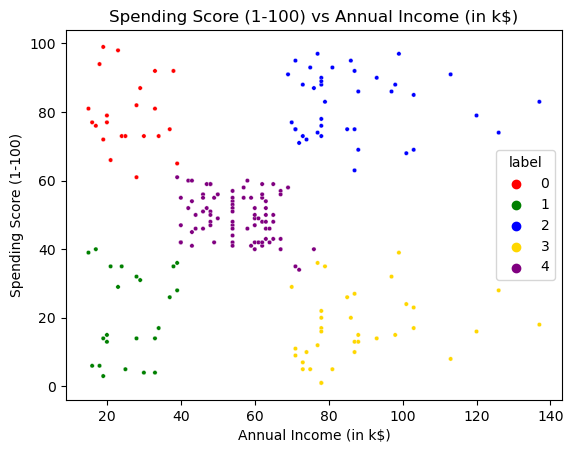

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing the dataset
# Load the data set
data = pd.read_csv('Mall_Customers.csv')
print(data.head())  # Display first few rows
print(data.info())

# Using the elbow method to find the optimal number of clusters
X = data[['annual_income', 'spending_score']]
# Using elbow method
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)

# The elbow curve
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")
plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))
plt.show()

# Fitting K-Means to the dataset
# Taking k = 5
k_means = KMeans(n_clusters=5, n_init="auto")
# Fitting the input data
k_means.fit(X)
# Predicting the labels of the input data
y_pred = k_means.predict(X)
# Adding the labels to a column named label
data["label"] = y_pred

# Visualizing the clusters
# Scatterplot of the clusters using seaborn
colors = ["red", "green", "blue", "gold", "purple"]
sns.scatterplot(x="annual_income", y="spending_score", hue="label",
                palette=colors, legend="full", data=data, s=10)
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()


# Q2-Part-a

In [16]:
import csv
import random

# Load the dataset
data = []
with open('CC GENERAL.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        data.append([float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5])])

# Selecting only the relevant columns for clustering and the first 20 data points
X_subset = data[:20]

# Define the number of clusters
k = 5

# Initialize medoids randomly
random.seed(0)
medoids_indices = random.sample(range(len(X_subset)), k)
medoids = [X_subset[i] for i in medoids_indices]

# Define a function to calculate Manhattan distance
def manhattan_distance(x1, x2):
    return sum(abs(a - b) for a, b in zip(x1, x2))

# Function to assign each data point to the nearest medoid
def assign_clusters(X, medoids):
    clusters = []
    for x in X:
        distances = [manhattan_distance(x, m) for m in medoids]
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return clusters

# Function to update medoids
def update_medoids(X, clusters, k):
    medoids = []
    for i in range(k):
        cluster_points = [X[j] for j in range(len(X)) if clusters[j] == i]
        distances = [sum(manhattan_distance(p1, p2) for p1 in cluster_points) for p2 in cluster_points]
        medoid_index = distances.index(min(distances))
        medoid = cluster_points[medoid_index]
        medoids.append(medoid)
    return medoids

# K-Medoid clustering
max_iter = 100
for _ in range(max_iter):
    prev_medoids = medoids.copy()
    clusters = assign_clusters(X_subset, medoids)
    medoids = update_medoids(X_subset, clusters, k)
    if prev_medoids == medoids:
        break

# Output the clusters and medoids
for i, medoid in enumerate(medoids):
    cluster_points = [X_subset[j] for j in range(len(X_subset)) if clusters[j] == i]
    print(f"Cluster {i+1}:")
    print("Medoid:", medoid)
    print("Cluster Points:")
    for point in cluster_points:
        print(point)
    print("-----------------------")

Defaulting to user installation because normal site-packages is not writeable


# Q2-Part-b

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

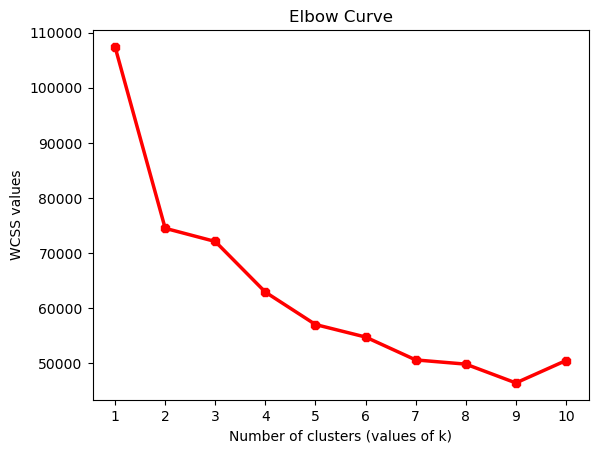

C:\Users\f219104\AppData\Local\Temp\ipykernel_17152\2254205539.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['label'] = y_pred


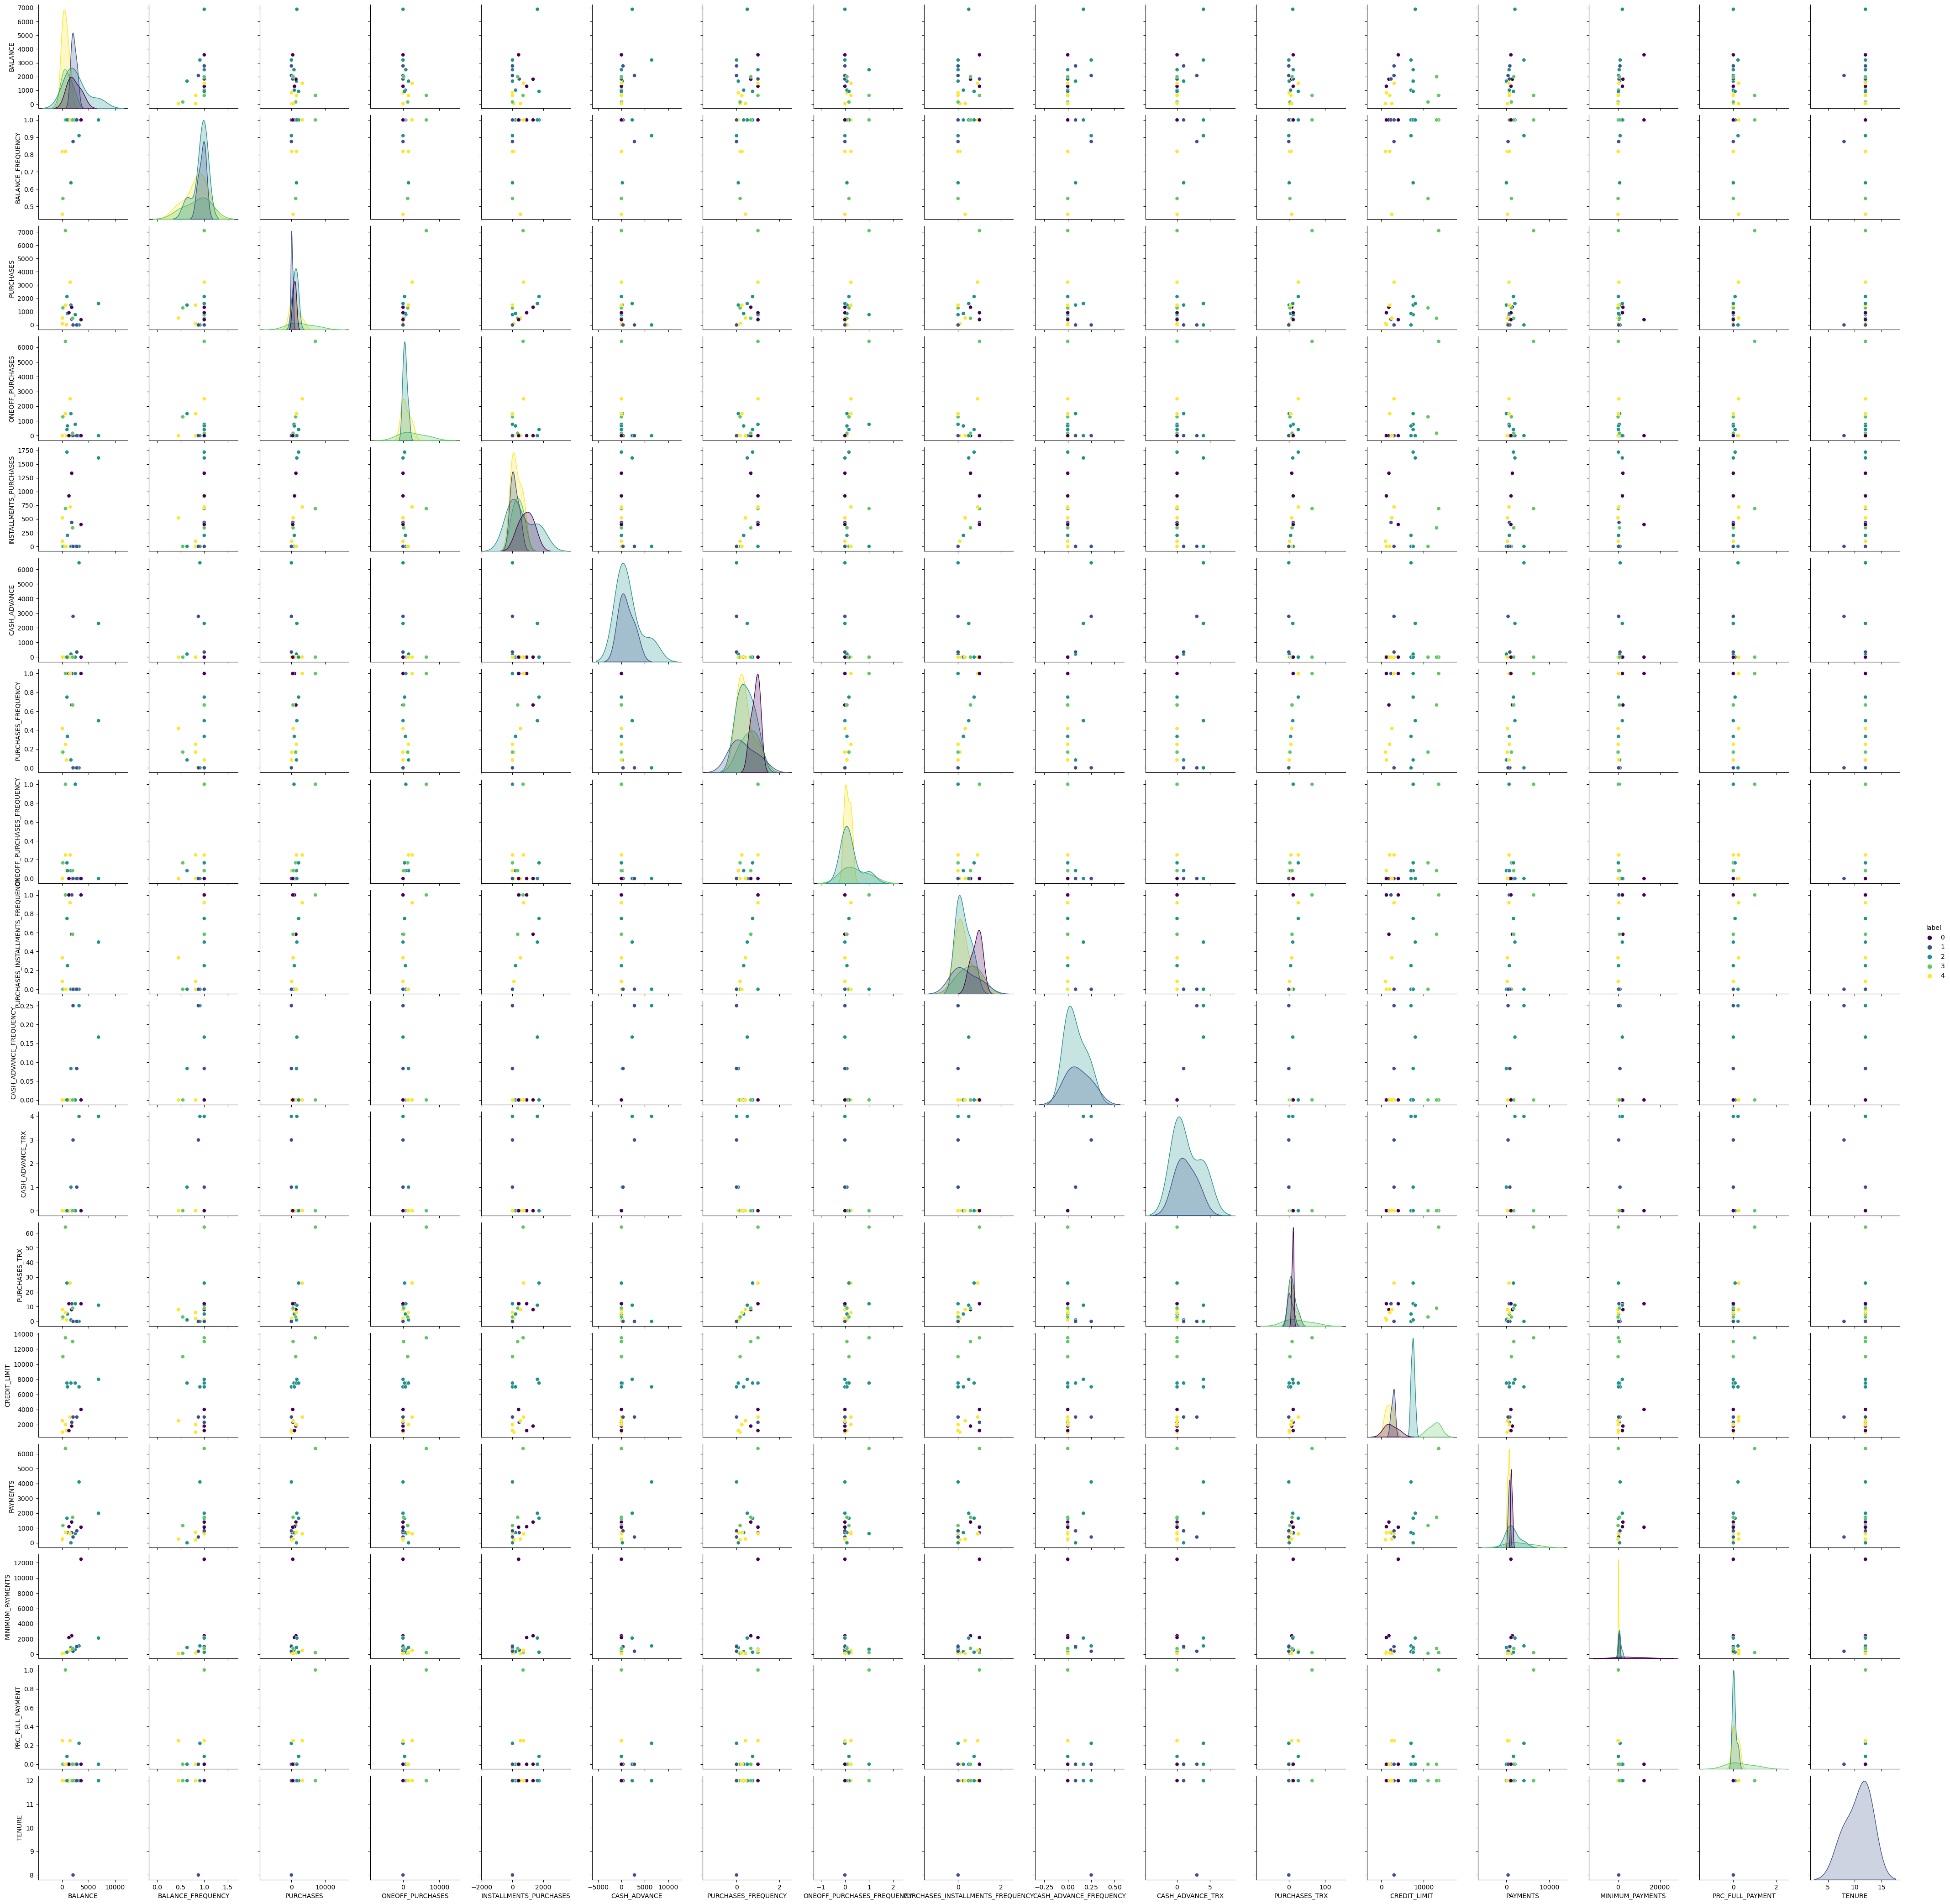

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.impute import SimpleImputer

# Importing the dataset
data = pd.read_csv('CC General.csv')
print(data.head())  # display first few rows
print(data.info())

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.drop(columns=['CUST_ID'])), columns=data.columns[1:])

# Selecting only the first 20 data points
data_subset = data_imputed.iloc[:20]

# Using the elbow method to find the optimal number of clusters
X = data_subset
wcss = []
for i in range(1, 11):
    k_medoids = KMedoids(n_clusters=i, init="heuristic")
    k_medoids.fit(X)
    wcss.append(k_medoids.inertia_)

# the elbow curve
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")
plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))
plt.show()

# Fitting K-Medoids to the dataset
# taking k = 5
k = 5  # Number of clusters
k_medoids = KMedoids(n_clusters=k, init="heuristic")
# fitting the input data
k_medoids.fit(X)

# Predicting the labels
y_pred = k_medoids.predict(X)

# Adding the labels to a column named label
data_subset['label'] = y_pred

# Visualizing the clusters
sns.pairplot(data=data_subset, hue='label', palette='viridis')
plt.show()